In [1]:
!wget https://stsci-opo.org/STScI-01G7WD4Y58KCQD3XTACYE926WC.png
!wget https://stsci-opo.org/STScI-01G7WCK1PJEM49E118GEG0Q729.png
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Checkerboard_Pattern_8x6.svg/1200px-Checkerboard_Pattern_8x6.svg.png

--2022-07-19 18:31:13--  https://stsci-opo.org/STScI-01G7WD4Y58KCQD3XTACYE926WC.png
Resolving stsci-opo.org (stsci-opo.org)... 18.65.229.76, 18.65.229.65, 18.65.229.127, ...
Connecting to stsci-opo.org (stsci-opo.org)|18.65.229.76|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1732589 (1.7M) [image/png]
Saving to: ‘STScI-01G7WD4Y58KCQD3XTACYE926WC.png.1’

STScI-01G7WD4Y58KCQ 100%[===================>]   1.65M  --.-KB/s    in 0.1s    

2022-07-19 18:31:13 (12.8 MB/s) - ‘STScI-01G7WD4Y58KCQD3XTACYE926WC.png.1’ saved [1732589/1732589]

--2022-07-19 18:31:13--  https://stsci-opo.org/STScI-01G7WCK1PJEM49E118GEG0Q729.png
Resolving stsci-opo.org (stsci-opo.org)... 18.65.229.76, 18.65.229.65, 18.65.229.127, ...
Connecting to stsci-opo.org (stsci-opo.org)|18.65.229.76|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3493524 (3.3M) [image/png]
Saving to: ‘STScI-01G7WCK1PJEM49E118GEG0Q729.png.1’

STScI-01G7WCK1PJEM4 100%[===================>]   

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import io

im2 = io.imread("/content/STScI-01G7WD4Y58KCQD3XTACYE926WC.png")
im1 = io.imread("/content/STScI-01G7WCK1PJEM49E118GEG0Q729.png")


orb = cv2.ORB_create(500000)

img1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)# convert to gray level images
img2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
img1 = cv2.medianBlur(img1, 3) #good for preserving edges
img2 = cv2.medianBlur(img2, 3) #good for preserving edges
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)


matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)


#MATCH DESCRIPTORS

matches = matcher.match(des1, des2, None)

matches = sorted(matches, key = lambda x:x.distance )
matches = matches[:20000]

points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i,:] = kp1[match.queryIdx].pt
    points2[i,:] = kp2[match.trainIdx].pt
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
height, width = img2.shape

im1Reg = cv2.warpPerspective(im1, h, (width, height))


plt.imsave('regfinnaly2.png' , im1Reg)    

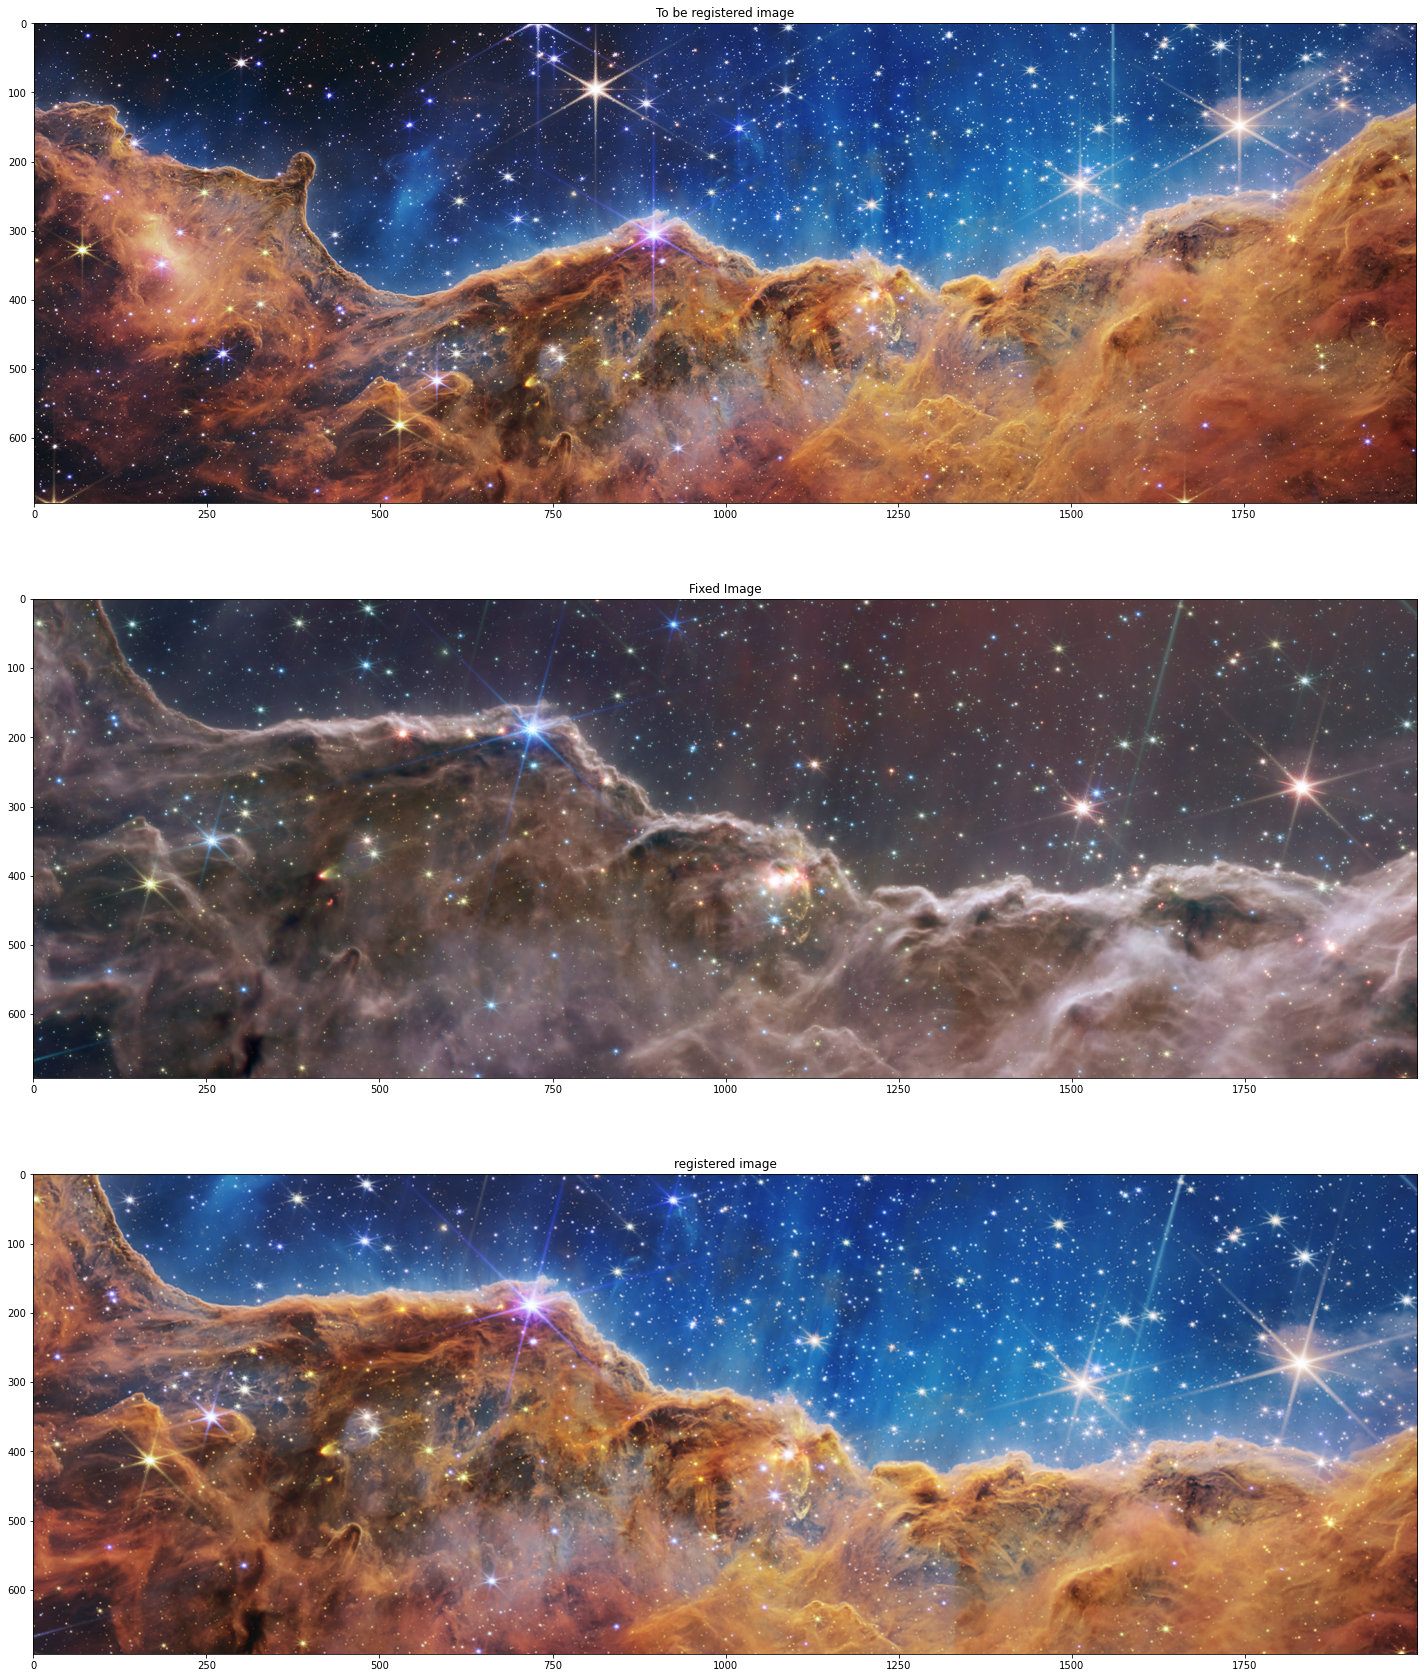

In [3]:
fig = plt.figure(figsize=(30, 30))
ax1 = fig.add_subplot(3,1,1)
ax1.imshow(im1[132:826,:,:])
ax1.title.set_text('To be registered image')
ax2 = fig.add_subplot(3,1,2)
ax2.imshow(im2)
ax2.title.set_text('Fixed Image')
ax3 = fig.add_subplot(3,1,3)
ax3.imshow(im1Reg)
ax3.title.set_text('registered image')
plt.show()

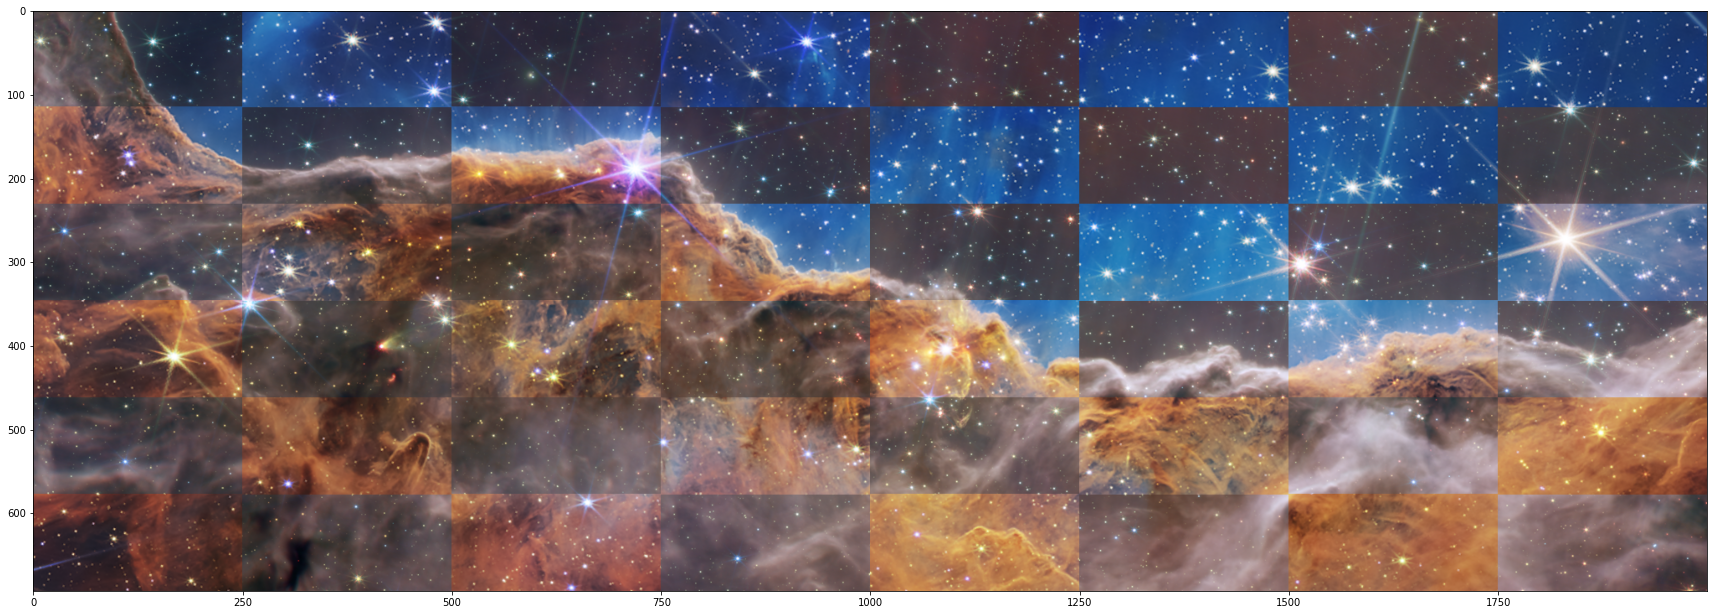

In [5]:
imoptill = io.imread("/content/1200px-Checkerboard_Pattern_8x6.svg.png", 'as_gray')
# imoptill = imoptill[220:1928,220:1928]
dim = (im2.shape[1], im2.shape[0])
  
# resize image
resized = cv2.resize(imoptill, dim, interpolation = cv2.INTER_AREA)
# plt.imshow(resized)
(thresh, im_bw) = cv2.threshold(resized, .1, 1, cv2.THRESH_BINARY)
imbi2 = im1Reg
imbi2[:,:,1] = (im_bw)*im1Reg[:,:,1]
imbi2[:,:,2] = (im_bw)*im1Reg[:,:,2]
imbi2[:,:,0] = (im_bw)*im1Reg[:,:,0]
imbi = im2
imbi[:,:,1] = (1-im_bw)*im2[:,:,1]
imbi[:,:,2] = (1-im_bw)*im2[:,:,2]
imbi[:,:,0] = (1-im_bw)*im2[:,:,0]
imbi4 = imbi2+imbi
fig = plt.figure(figsize=(30, 17))
plt.imshow(imbi4)
